
Train a network using eta = 0.025
Epoch 0 training complete
Cost on training data: 731.8195315067348
Epoch 1 training complete
Cost on training data: 1095.4873482068233
Epoch 2 training complete
Cost on training data: 1345.3316852739708
Epoch 3 training complete
Cost on training data: 1543.5657593485566
Epoch 4 training complete
Cost on training data: 1715.6486008177828
Epoch 5 training complete
Cost on training data: 1868.6503290010166
Epoch 6 training complete
Cost on training data: 2009.6328913634532
Epoch 7 training complete
Cost on training data: 2139.810730258892
Epoch 8 training complete
Cost on training data: 2263.4192134489454
Epoch 9 training complete
Cost on training data: 2377.077316976108
Epoch 10 training complete
Cost on training data: 2485.74928497312
Epoch 11 training complete
Cost on training data: 2587.472563745618
Epoch 12 training complete
Cost on training data: 2683.0181584104157
Epoch 13 training complete
Cost on training data: 2773.847880777933
Epoch 14 trainin

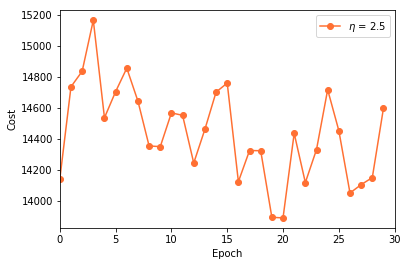

In [1]:
"""
multiple_eta
~~~~~~~~~~~~~~~
This program shows how different values for the learning rate affect
training.  In particular, we'll plot out how the cost changes using
three different values for eta.
"""

# Standard library
import json
import random
import sys
# My library
sys.path.append('../src/')
import mnist_loader
import network2
# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np

# Constants
LEARNING_RATES = [0.025, 0.25, 2.5]
COLORS = ['#2A6EA6', '#FFCD33', '#FF7033']
NUM_EPOCHS = 30

def main():
    run_network()
    make_plot()

def run_network():
    """Train networks using three different values for the learning rate,
    and store the cost curves in the file ``multiple_eta.json``, where
    they can later be used by ``make_plot``.
    """
    # Make results more easily reproducible
    random.seed(12345678)
    np.random.seed(12345678)
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    results = []
    for eta in LEARNING_RATES:
        print ("\nTrain a network using eta = "+str(eta))
        net = network2.Network([784,30,10])
        results.append(net.SGD(training_data, NUM_EPOCHS, 10, eta, lmbda = 5.0,
                      evaluation_data=validation_data, monitor_training_cost=True))
    f = open("multiple_eta.json","w")
    json.dump(results,f)
    f.close()

def make_plot():
    f = open("multiple_eta.json", "r")
    results = json.load(f)
    f.close()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for eta, result, color in zip(LEARNING_RATES, results, COLORS):
        _,_,training_cost,_ = result
        # print(training_cost)
    ax.plot(np.arange(NUM_EPOCHS), training_cost, "o-",label = "$\eta$ = "+str(eta),color = color)
    ax.set_xlim([0,NUM_EPOCHS])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Cost')
    plt.legend(loc = 'upper right')
    plt.show()

if __name__ == "__main__":
    main()
